Importing the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tqdm.autonotebook import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor



<ipython-input-3-728e3a158be9>:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
data= pd.read_csv('data.csv')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [5]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


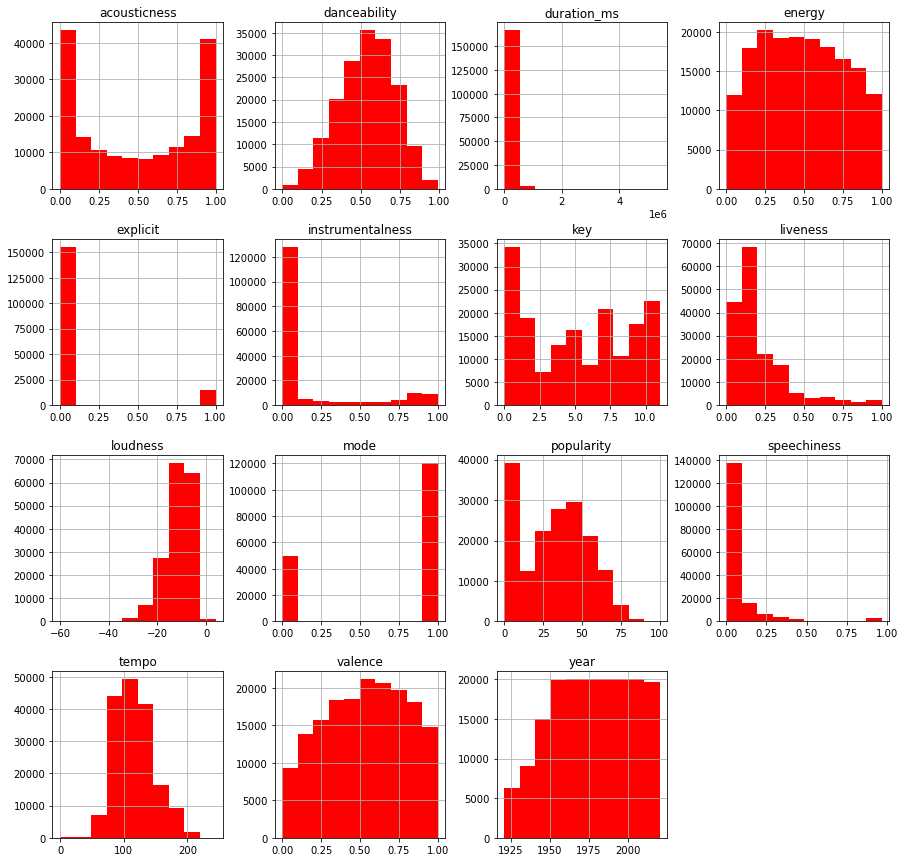

In [7]:
data.hist(figsize=(15, 15), color='red')
plt.show()

<AxesSubplot:>

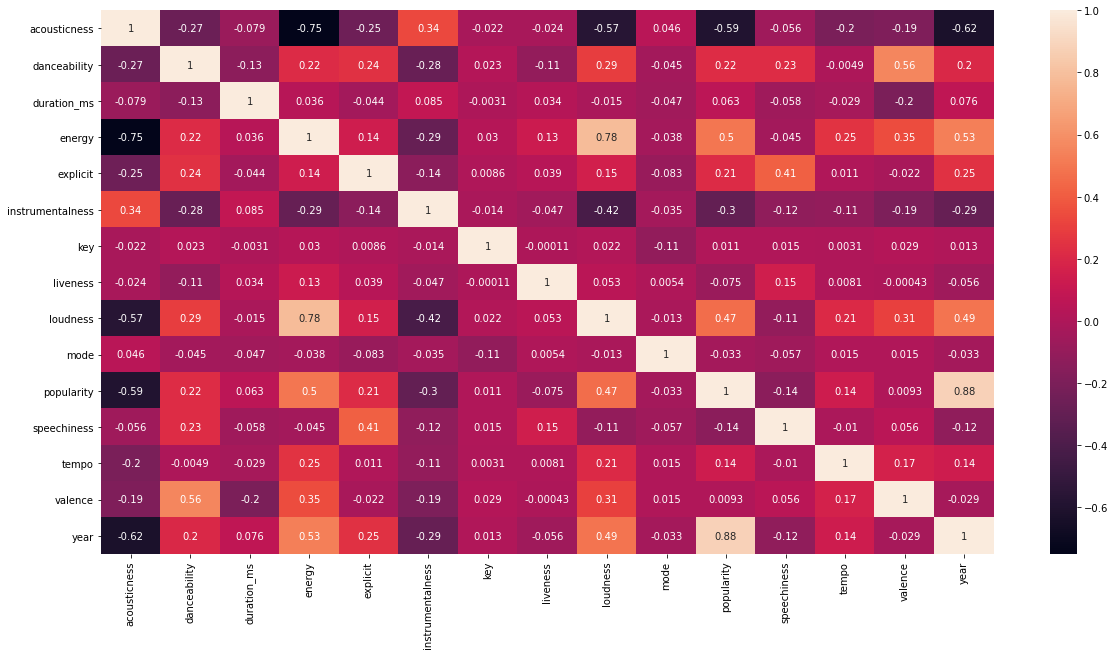

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='year', ylabel='popularity'>

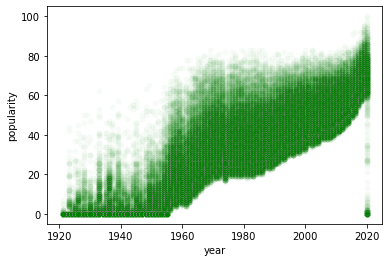

In [11]:
sns.scatterplot(x="year", y="popularity", data=data, alpha=0.03, color='green')

<AxesSubplot:xlabel='danceability', ylabel='popularity'>

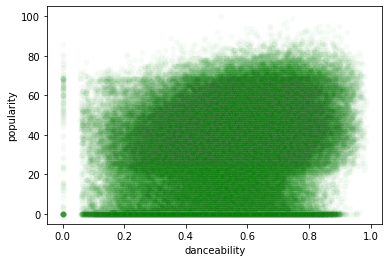

In [12]:
sns.scatterplot(x="danceability", y="popularity", data=data, alpha=0.03, color='green')

<AxesSubplot:xlabel='energy', ylabel='popularity'>

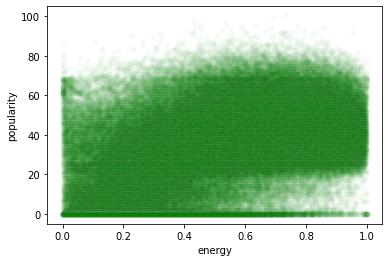

In [13]:
sns.scatterplot(x="energy", y="popularity", data=data, alpha=0.03, color='green')

<AxesSubplot:xlabel='loudness', ylabel='popularity'>

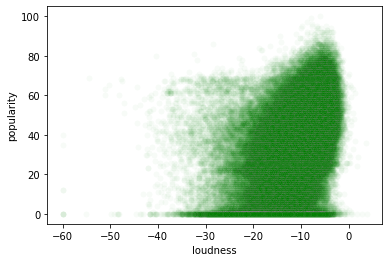

In [14]:
sns.scatterplot(x="loudness", y="popularity", data=data, alpha=0.03, color='green')

<AxesSubplot:xlabel='tempo', ylabel='popularity'>

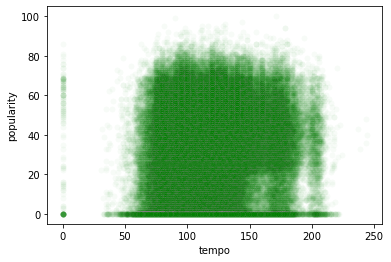

In [15]:
sns.scatterplot(x="tempo", y="popularity", data=data, alpha=0.03, color='green')

In [16]:
features = ['year', 'danceability', 'energy', 'loudness', 'tempo']
tracks_data = data.copy()
features_tracks_data = data[features]

In [17]:
class Artist: 
    def __init__(self, name, popularity): 
        self.name = name
        self.popularity = popularity
        
        
class Track: 
    def __init__(self, name, artists, popularity): 
        self.name = name
        self.artists = artists
        self.popularity = popularity   
        
        

tracks = []

names = tracks_data.name.values
artists_names = tracks_data.artists.values
popularity = tracks_data.popularity.values

for index in range(len(names)): 
    track = Track(names[index], artists_names[index], popularity[index])
    tracks.append(track)
artists = []
artists_names_done = []
artists_popularities = []

for artists_str in tqdm(artists_names): 
    artists_sub_list = artists_str[1:-1].split(', ')
    
    track_pop = 0
    for artist in artists_sub_list: 
        
        if artist in artists_names_done: 
            a = [x for x in artists if x.name == artist][0]
            artist_pop = a.popularity
            
        else: 
            songs_pop = [x.popularity for x in tracks if artist in x.artists]
            artist_pop = sum(songs_pop) / len(songs_pop)
            artists_names_done.append(artist)
            a = Artist(artist, artist_pop)
            artists.append(a)
        
        track_pop += artist_pop
        
    track_pop /= len(artists_sub_list)
    artists_popularities.append(track_pop)
    
artists_popularities = np.asarray(artists_popularities)

print(artists_popularities.max())


94.0


***Data Normalization***

In [18]:
scaler = StandardScaler()
scaler.fit(features_tracks_data)
features_tracks_data = scaler.transform(features_tracks_data)

print(features_tracks_data.shape) 
features_tracks_data = np.column_stack((artists_popularities / 100, features_tracks_data))
print(features_tracks_data.shape)

y_tracks_data = tracks_data.popularity.values / 100

X_train, X_test, y_train, y_test = train_test_split(features_tracks_data, y_tracks_data, test_size=0.2, random_state=42)

(169909, 5)
(169909, 6)


In [19]:
for column in range(X_train.shape[1]): 
    print(X_train[:, column].min(), X_train[:, column].max())

0.0 0.94
-2.1968127400161177 1.6714185300685283
-3.0690860912949547 2.56551142176794
-1.8272736103842508 1.9125939744025369
-8.581590551706142 2.6867772179757763
-3.8060533934124843 4.137846808677985


Create Random Forest Regressor

In [20]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
preds = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print("Test Accuracy: {:.4f}".format(accuracy*100))

average_error = (abs(y_test - preds)).mean()
print("{:.4f} average error".format(average_error))

Test Accuracy: 86.1203
0.0550 average error


In [22]:
for index in range(len(preds[:100])): 
    
    pred = preds[index]
    actual = y_test[index]
    
    print("Actual / Predicted: {:.4f} / {:.4f}".format(actual, pred))

Actual / Predicted: 0.4800 / 0.5040
Actual / Predicted: 0.1600 / 0.1454
Actual / Predicted: 0.0200 / 0.0575
Actual / Predicted: 0.1300 / 0.1287
Actual / Predicted: 0.3400 / 0.3390
Actual / Predicted: 0.4500 / 0.4983
Actual / Predicted: 0.3600 / 0.4194
Actual / Predicted: 0.0000 / 0.0277
Actual / Predicted: 0.2700 / 0.3720
Actual / Predicted: 0.0100 / 0.0753
Actual / Predicted: 0.0000 / 0.0019
Actual / Predicted: 0.0200 / 0.0192
Actual / Predicted: 0.0000 / 0.0032
Actual / Predicted: 0.7200 / 0.5183
Actual / Predicted: 0.3200 / 0.4107
Actual / Predicted: 0.1200 / 0.1705
Actual / Predicted: 0.1000 / 0.1908
Actual / Predicted: 0.6000 / 0.7263
Actual / Predicted: 0.0500 / 0.1471
Actual / Predicted: 0.5700 / 0.6280
Actual / Predicted: 0.4500 / 0.5095
Actual / Predicted: 0.6500 / 0.6883
Actual / Predicted: 0.0200 / 0.0850
Actual / Predicted: 0.2600 / 0.3316
Actual / Predicted: 0.0000 / 0.0000
Actual / Predicted: 0.2300 / 0.2598
Actual / Predicted: 0.4700 / 0.3610
Actual / Predicted: 0.4100 /